In [18]:
# This for training the model and visualizing the predictions and actual values

# Importing Required Libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

# Creating the Model
Model = DecisionTreeRegressor(random_state = 1)

In [19]:
# Reading File
Data = pd.read_csv("NVDA.csv")

# Dropping Unnamed columns
Change = {"Unnamed: 11": "a",
        "Unnamed: 12": "b"}
Data.rename(columns=Change, inplace=True)
new_drop = ["a","b"]
Data.drop(new_drop, inplace=True, axis=1)

# Making new file
Year = int(2018)
TVal = Data[Data["Year"].isin([Year])]
Val = TVal.round(decimals=3)

# Feature and Prediction Target Selection
X = Val[["High","Low"]]
Y = Val.Average

# Train Test Split 
train_X, val_X, train_Y, val_Y = train_test_split(X,Y,random_state = 0)

In [20]:
# Training Data 
Model.fit(train_X, train_Y)
Train_Pred = Model.predict(val_X)
print(mean_absolute_error(val_Y, Train_Pred))

0.2786349206349211


In [21]:
# Export DecisionTree as a figure (Commented out to save processing power)
'''fig = plt.figure(figsize=(200,200))
Display = tree.plot_tree(Model, filled=True)

fig.savefig("decisiontree.png",facecolor="#ffffff")'''

'fig = plt.figure(figsize=(200,200))\nDisplay = tree.plot_tree(Model, filled=True)\n\nfig.savefig("decisiontree.png",facecolor="#ffffff")'

In [22]:
New_list = []

df = pd.DataFrame({"Actual Values": val_Y, 
                   "Predicted Values": Train_Pred})

# Adding data to the array
for i in range(1,len(df)+1):
    New_list.append(i)

# Creating new Serial No. column and making it a csv file
print(len(df))
df["Serial No."] = New_list
df.to_csv("Results.csv")

Result = pd.read_csv("Results.csv")
df

63


,Actual Values,Predicted Values,Serial No.
294,63.600,63.940,1
263,60.241,60.292,2
233,61.800,61.666,3
299,62.087,61.735,4
290,62.985,62.949,5
...,...,...,...
275,62.255,62.153,59
156,59.255,59.456,60
332,70.304,70.528,61
215,57.488,57.709,62


In [23]:
# Preparing for plotting
Res_X = Result["Serial No."]
Res_Y = Result["Actual Values"]
Res_Z = Result["Predicted Values"]

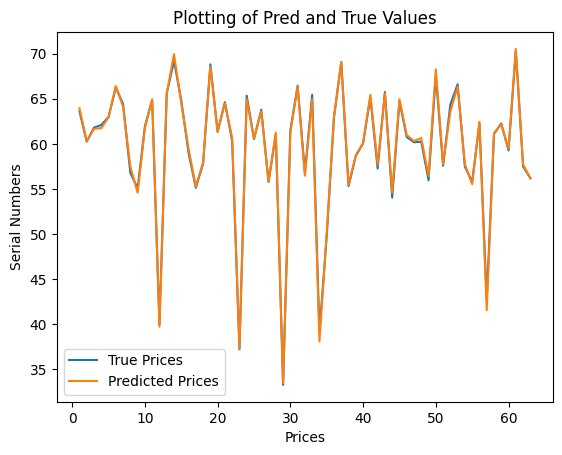

In [24]:
# Plotting True and Predicted Prices 
fig, ax = plt.subplots()
ax.plot(Res_X,Res_Y,label = "True Prices")
ax.plot(Res_X,Res_Z,label = "Predicted Prices")
ax.set_title("Plotting of Pred and True Values")
LabelX = ax.set_xlabel("Prices")
LabelY = ax.set_ylabel("Serial Numbers")
ax.legend()

In [25]:
# Predicting own values
Y_Pred = Model.predict([[38,37]])
print(Y_Pred)

[37.314]


c:\Users\Aryan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
